In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math

import wrangle
import evaluation


from pydataset import data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
zillow = wrangle.wrangle_zillow()

/Users/jarad/codeup_data_science/regression_exercises/wrangle.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fed_code"] = df["fips"].astype(int)
/Users/jarad/codeup_data_science/regression_exercises/wrangle.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year_built"] = df["yearbuilt"].astype(int)
/Users/jarad/codeup_data_science/regression_exercises/wrangle.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [3]:
z_train, z_test = train_test_split(zillow, train_size=0.8, random_state=123)
z_train, z_validate = train_test_split(z_train, train_size=0.7, random_state=123)

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [4]:

model = LinearRegression().fit(z_train[['sq_ft']], z_train['tax_value'])
predictions = model.predict(z_train[['sq_ft']])
z_train['yhat'] = predictions

In [27]:
z_train['baseline'] = z_train.tax_value.mean()

z_train['baseline_resid'] = z_train.baseline - z_train.tax_value
z_train.head()

,Unnamed: 0,taxamount,latitude,longitude,regionidcounty,fed_code,beds,tax_value,sq_ft,baths,...,pools,bed_bath_ratio,overall_size,house_age,yhat,baseline,baseline_resid,residual,resid^2,baseline_resid^2
31811,31811,9707.36,33717884.0,-118060517.0,1286.0,6059,3,877778.0,1954.0,2.0,...,False,1.5,7954.0,52,470696.475113,444748.396233,-433029.603767,-407081.524887,1.657154e+11,1.875146e+11
10416,10416,4393.91,33865202.0,-118086787.0,3101.0,6037,4,349591.0,3857.0,4.0,...,True,1.0,53599.0,84,946730.085581,444748.396233,95157.396233,597139.085581,3.565751e+11,9.054930e+09
4382,4382,1128.70,33768785.0,-117926001.0,1286.0,6059,5,63411.0,1462.0,2.0,...,True,2.5,10246.0,58,347623.150704,444748.396233,381337.396233,284212.150704,8.077655e+10,1.454182e+11
11286,11286,2638.82,33956371.0,-118239103.0,3101.0,6037,3,180147.0,882.0,1.0,...,False,3.0,8025.0,95,202536.711360,444748.396233,264601.396233,22389.711360,5.012992e+08,7.001390e+10
42188,42188,2553.61,34051574.0,-118546974.0,3101.0,6037,3,191119.0,2531.0,3.0,...,True,1.0,20809.0,60,615032.467356,444748.396233,253629.396233,423913.467356,1.797026e+11,6.432787e+10


Plot the residuals for the linear regression model that you made.

In [23]:
z_train['residual'] = z_train.yhat - z_train.tax_value

Text(0.5, 1.0, 'OLS model residuals')

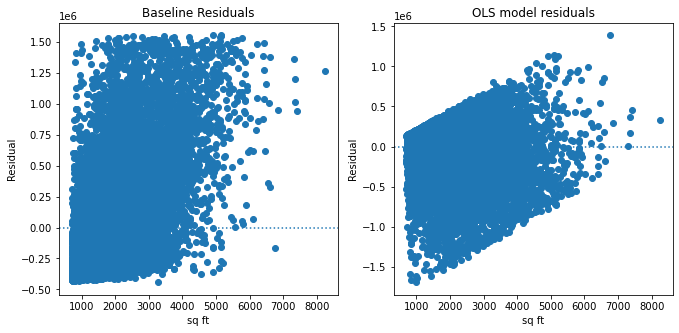

In [24]:
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(z_train.sq_ft, z_train.baseline_resid)
plt.axhline(y = 0, ls = ':')
plt.xlabel('sq ft')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(z_train.sq_ft, z_train.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('sq ft')
plt.ylabel('Residual')
plt.title('OLS model residuals')

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [25]:
#Sum of squares
z_train['resid^2'] = z_train.residual**2
z_train['baseline_resid^2'] =z_train.baseline_resid**2

SSE = z_train['resid^2'].sum()
SSE_baseline = z_train['baseline_resid^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 2321954257856807.0
SSE Baseline = 3472183347147511.5


In [26]:
#Explained Square of errors
ESS = sum((z_train.yhat - z_train.baseline_resid)**2)

In [10]:
# Total sum of squares
TSS = SSE + ESS

In [11]:
# Mean Squared error
MSE = SSE / len(z_train)

In [12]:
#Root mean squared error
RSME = mean_squared_error(z_train.tax_value, z_train.yhat, squared=False)

In [13]:
print(f'SSE = {SSE}, ESS = {ESS}, TSS = {TSS}, TSS = {TSS}, MSE = {MSE}, RMSE = {RSME}')


SSE = 2321954257856807.0, ESS = 7813704996411676.0, TSS = 1.0135659254268484e+16, TSS = 1.0135659254268484e+16, MSE = 83631834672.84279, RMSE = 289191.6919153156


Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [14]:
# SSE Basline was completed above

MSE_baseline = SSE_baseline / len(z_train)


In [15]:
RSME_baseline = mean_squared_error(z_train.tax_value, z_train.baseline, squared=False)

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [16]:
if SSE < SSE_baseline:
    print ('The model preforms better than baseline')
else:
    print ('Model underperforms')

The model preforms better than baseline


What is the amount of variance explained in your model?

In [17]:
# for variance use r^2

print (f'The variance is {r2_score(z_train.tax_value, z_train.yhat): %}')

The variance is  33.126969%


Is your model better than the baseline model?

In [18]:
# NOPE

In [19]:
y = z_train.tax_value
yhat = z_train.yhat

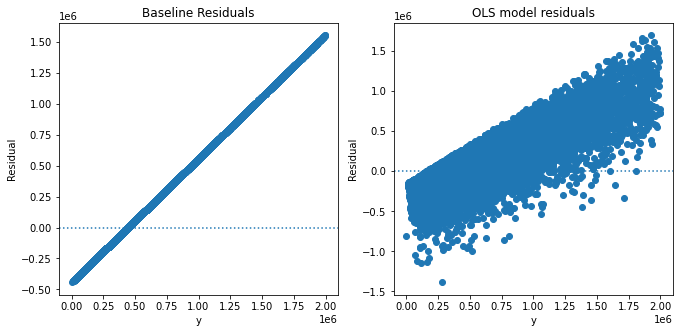

In [20]:
evaluation.plot_residuals(y, yhat)

In [21]:
z_train.baseline

31811    444748.396233
10416    444748.396233
4382     444748.396233
11286    444748.396233
42188    444748.396233
             ...      
18239    444748.396233
21380    444748.396233
3295     444748.396233
6393     444748.396233
26098    444748.396233
Name: baseline, Length: 27764, dtype: float64

In [22]:
r2 = ESS/ TSS

r2

0.7709123600540388